In [1022]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import statsmodels as stat
from statsmodels.tsa.api import Holt
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from math import pi
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

# I-Le contenu des jeux de données

EdStatsCountry.csv: contient des données économiques globales et dates de référence.

EdStatsCountry-Series.csv: contient des informations sur la source des données indicateurs par pays.

EdStatsData.csv: donne l'évolution de plusieurs indicateurs pour les pays et régions du monde, avec projection.

EdStatsFootNote.csv: donne des informations sur l'année d'origine, l'incertitude et la description des données par pays.

EdStatsSeries.csv: donne des données descriptives sur les indicateurs socio-économiques disponibles dans data.

Conclusion: J'estime que les données du EdStatsData.csv sont suffisantees pour répondre a la problimatique.

# II-Analyse prè-exploratoire

# 1- Description du jeu de données EdStatsData.csv

**1-Chargez le fichier EdStatsData.csv à l'aide de Pandas. Stockez le résultat du chargement dans la variable Data. Les colonnes du fichier sont uniquement séparées par des virgules.**

In [1023]:
Data = pd.read_csv('EdStatsData.csv', sep=',')

**2-Stockez le résultat du chargement dans la variable DataProjection pour la partie projection.**

In [1024]:
DataProjection=Data

**3-Afficher les 5 premiere lignes de Data**

In [1025]:
Data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1026]:
Data.shape

(886930, 70)

In [1027]:
Data.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

**4-Description globale du jeu de données**

In [1028]:
Data.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


Toutes les variables 'année' contiennent des données exploitables, sauf la derniere elle est vide et devra être supprimée.

**5-Déscription des colonnes**

In [1029]:
Data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [1030]:
Data['Indicator Name'].unique()

array(['Adjusted net enrolment rate, lower secondary, both sexes (%)',
       'Adjusted net enrolment rate, lower secondary, female (%)',
       'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
       ..., 'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, gender parity index (GPI)',
       'Youth literacy rate, population 15-24 years, male (%)'],
      dtype=object)

**6-Nombre d'indicateurs par pays**

In [1031]:
Data['Indicator Name'].nunique()

3665

In [1032]:
Data['Country Name'].value_counts()

Arab World               3665
Portugal                 3665
Micronesia, Fed. Sts.    3665
Moldova                  3665
Monaco                   3665
                         ... 
Equatorial Guinea        3665
Eritrea                  3665
Estonia                  3665
Ethiopia                 3665
Zimbabwe                 3665
Name: Country Name, Length: 242, dtype: int64

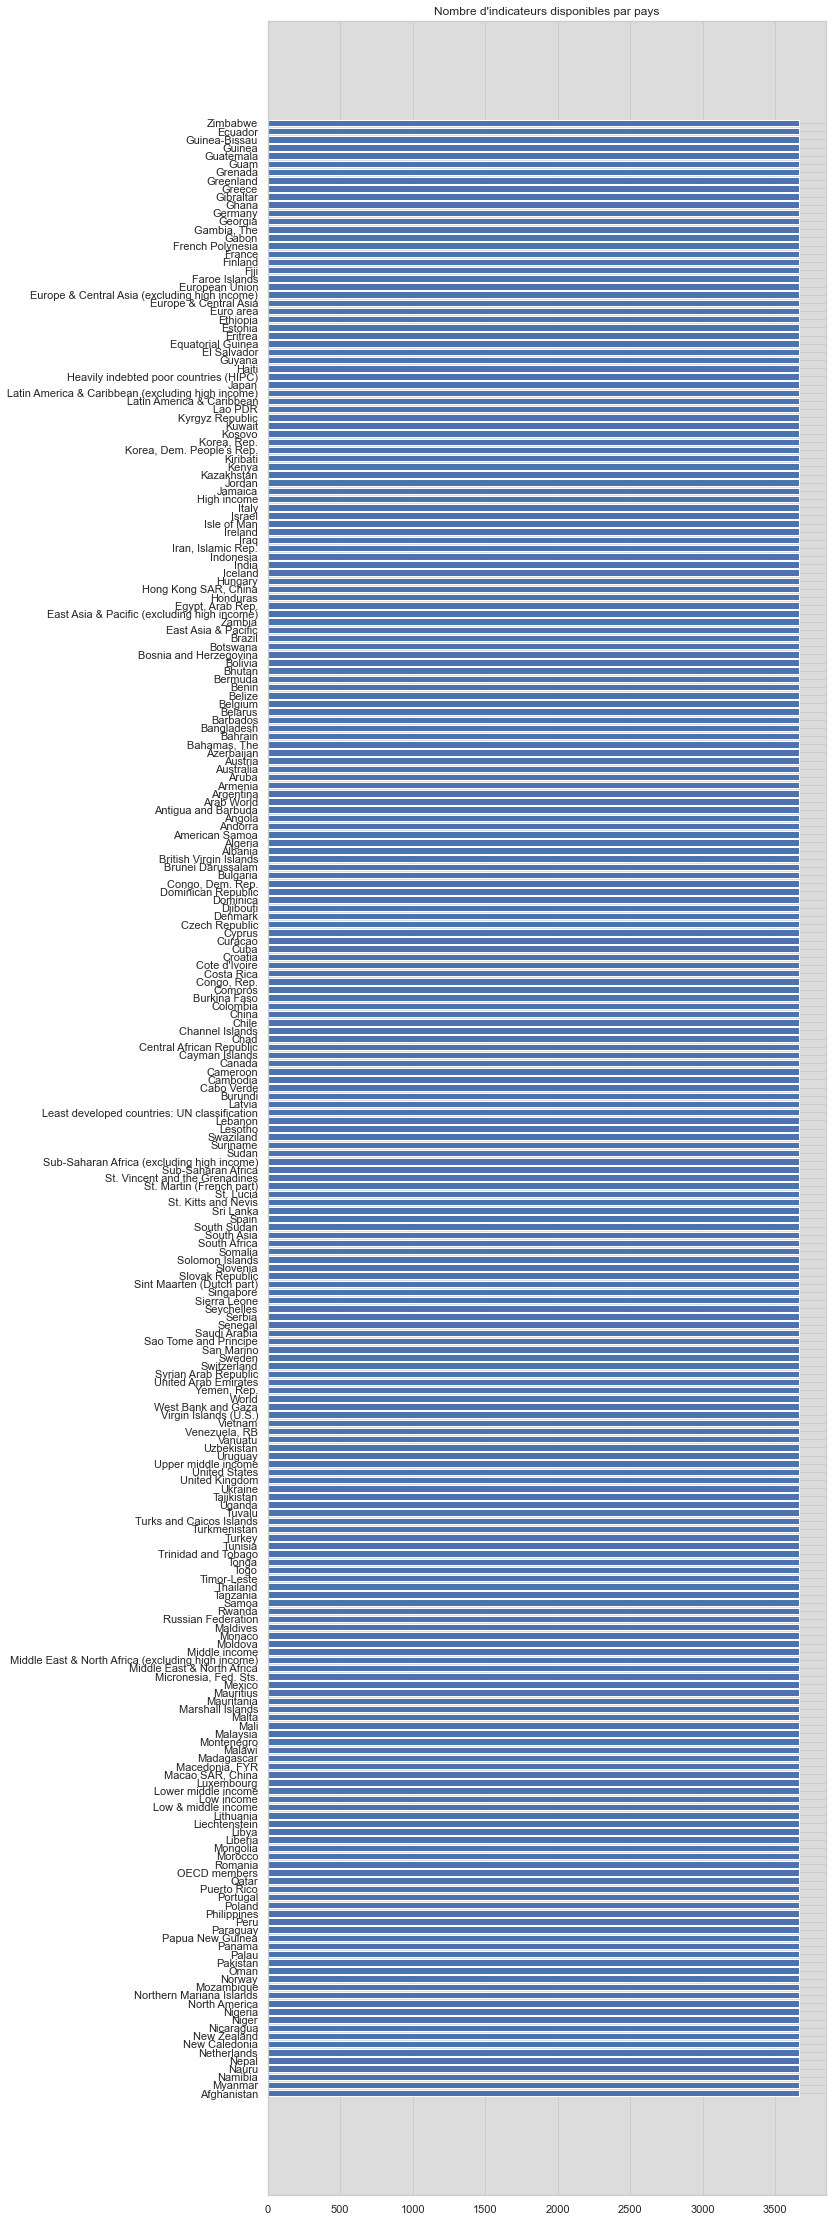

In [1033]:
plt.figure(figsize=(10,40))
plt.barh(y = Data.groupby('Country Name')[['Indicator Code']].count().reset_index().sort_values(by='Indicator Code')['Country Name'], 
         width =  Data.groupby('Country Name')[['Indicator Code']].count().reset_index().sort_values(by='Indicator Code')['Indicator Code'])
plt.title('Nombre d\'indicateurs disponibles par pays')
plt.show()

**7-Existe-t-il des Doublons dans ce jeu de données ?**

In [1034]:
Data['Indicator Name'].value_counts()

Adjusted net enrolment rate, lower secondary, both sexes (%)                                       242
Population, ages 10-18, female                                                                     242
Population, ages 10-18, total                                                                      242
Population, ages 11-15, female                                                                     242
Population, ages 11-15, male                                                                       242
                                                                                                  ... 
Expenditure on education not allocated by level as % of government expenditure on education (%)    242
Expenditure on lower secondary as % of government expenditure on education (%)                     242
Expenditure on lower secondary as % of total government expenditure (%)                            242
Expenditure on post-secondary non-tertiary as % of government expenditure

In [1035]:
Data['Country Name'].nunique()

242

In [1036]:
Data['Indicator Name'].nunique() * Data['Country Name'].nunique() == Data.shape[0]

True

Il n y a pas de doublon, il y a une liste de 3665 indicateurs pour chaque pays.

**8-Existe-t-il des valeurs manquantes dans ce jeu de données ?**

Poucentage de valeur manquante

In [1037]:
Data.isnull().sum() / Data.shape[0] * 100.00

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1970               91.849639
                     ...    
2085               94.200670
2090               94.200670
2095               94.200670
2100               94.200670
Unnamed: 69       100.000000
Length: 70, dtype: float64

**9-Répartition du nombre de données par année / par décénnie**

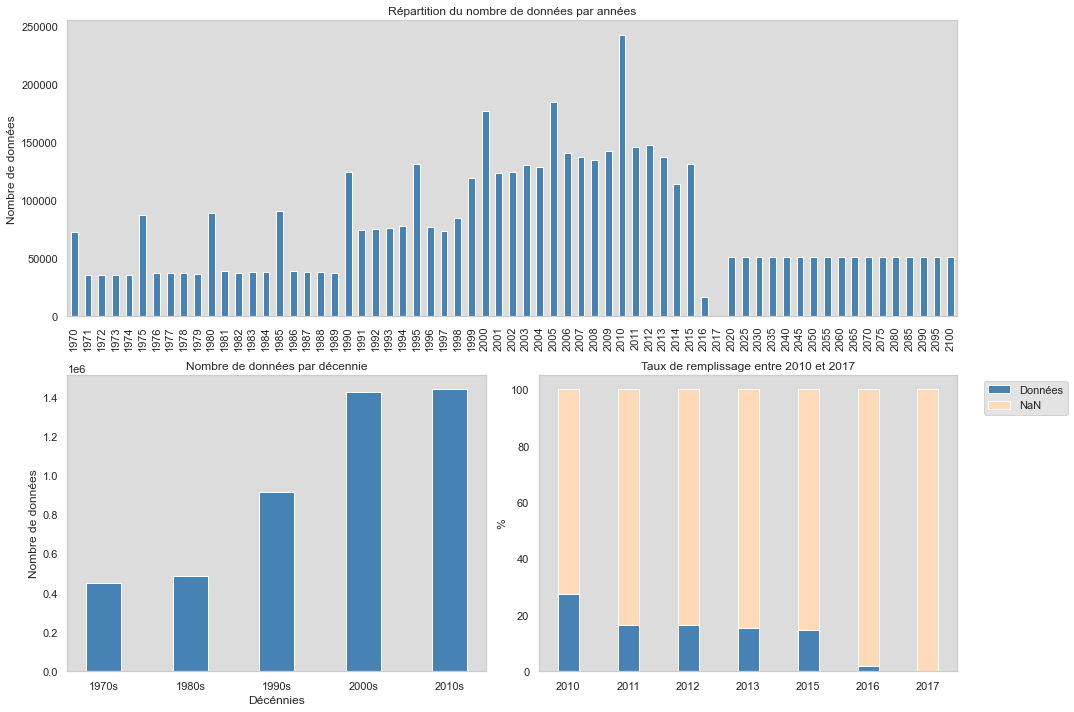

In [1038]:
plt.figure(figsize=(15, 10))
G = gridspec.GridSpec(2, 2)

# Graphique ligne 1, sur les 2 colonnes ------------------
ax1 = plt.subplot(G[0, :])
# Répartition du nombre de données renseignées par années pour tous les indicateurs et tous les pays
present = Data.loc[:,'1970':'2100'].notnull().sum()
ax1 = present.plot(kind='bar', color='SteelBlue')
ax1.set_title('Répartition du nombre de données par années')
ax1.set_ylabel('Nombre de données')
ax1.grid(False)

# Graphique ligne 2, colonne 1 ------------------
ax2 = plt.subplot(G[1, 0])
# Regroupement du nombre de données par décennie, les années 70, 80...
decade=Data.loc[:,'1970':'2020'].copy().count()
ans=['1970s','1980s','1990s','2000s','2010s']
for i in range(5):
    j=i*10
    k=j+10
    decade[ans[i]]=decade[j:k,].sum()
# Affihage de la répartitions des données exploitables par décennie
width = 0.4   
ax2.bar(decade[ans].index, decade[ans].values, width, color='SteelBlue')
# ax2 = sns.barplot(y = decade[ans].values, x = decade[ans].index, color='SteelBlue')
ax2.set_xlabel('Décénnies')
ax2.set_ylabel('Nombre de données')
ax2.set_title('Nombre de données par décennie', size=12)
ax2.grid(False)
# Graphique ligne 2, colonne 2 ------------------
ax3 = plt.subplot(G[1, 1])
# Nombre de données totales
nb_tot=Data.shape[0]
# Nombre de données non nulles par année de la décénnie 2010
annees=['2010','2011','2012','2013','2015','2016','2017']
nb_nonnul=Data.copy()[annees].count()
df_2010s = pd.DataFrame({'annee':nb_nonnul.index, 'nb_nonnul':nb_nonnul.values})
# Taux de données non nulles par année de la décénnie 2010
df_2010s['%_nonnul']=round((df_2010s['nb_nonnul'])*100/nb_tot,2)
# Nombre de NaN par année de la décénnie 2010
df_2010s['%_nan']=round(100-df_2010s['%_nonnul'],2)
width = 0.35      
annes=df_2010s.index
taux_remplissage=df_2010s['%_nonnul']
taux_nan=df_2010s['%_nan']
ax3.bar(annees, taux_remplissage, width, label='Données', color='SteelBlue')
ax3.bar(annees, taux_nan, width, bottom=taux_remplissage, label='NaN', color='PeachPuff')
ax3.set_ylabel('%')
ax3.set_title('Taux de remplissage entre 2010 et 2017')
ax3.legend(bbox_to_anchor=(1.05, 1),loc = 2)
ax3.grid(False)
plt.tight_layout()
plt.show()

**Bilan1:**

Ce jeu de données donne l'évolution de plusieurs indicateurs sur une période de 1970 à 2016 pour tous les pays du monde et certaines macros régions du monde. il semble donc etre intéressant pour notre problématique. Les années 2020 à 2100 sont des années de prédictions.

Le jeu de données contient 886930 lignes et 70 colonnes.

Aucun doublon.

Les colonnes code et nom, des pays et code et nom, des indicateurs sont 100% complètes.

L'année comportant le maximum de données est l'année 2010.

Les années 1970 à 1998 ne contiennent pas beaucoup de données

Les années 2016 et 2017, contiennent moins de 2 % de variables et sont donc inexploitables.

La dernière année exploitable est 2015.

La variable 'Country Name' contient 242 pays et régions.

# 2- Choix des Indicateurs candidats

**1-indicateurs candidats :**

**ducatif:**

Enrolment in secondary education, both sexes (number):(SE.SEC.ENRL)

Enrolment in tertiary education, all programmes, both sexes (number):(SE.SEC.ENRL)

**Economique:**

GDP per capita, PPP (current international $):( NY.GDP.PCAP.PP.CD)

GNI per capita, PPP (current international $):( NY.GNP.PCAP.PP.CD)

**Numerqiue:**

Internet users (per 100 people):(IT.NET.USER.P2)

Personal computers (per 100 people):(IT.CMP.PCMP.P2)

**Démografique:**

Population, ages 15-24, total:(SP.POP.1524.TO.UN)

**2-Réduction temporelle(2010-2015):**

In [1039]:
Data= Data.loc[: , ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2010', '2011', '2012', '2013', '2014', '2015'] ]

In [1040]:
Data

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,85.211998,85.24514,86.101669,85.51194,85.320152,NaN
...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,166679.00000,NaN,NaN,199464.000000,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,90.93070,NaN,NaN,90.428120,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,92.12456,NaN,NaN,93.188350,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,1.02828,NaN,NaN,1.063890,NaN


**3-Supprimer les groupes de pays et groupes de revnus**

In [1041]:
GroupePays=['ARB','EAS','EAP','EMU','ECS','ECA','EUU','HPC','HIC','LCN','LAC','LDC','LMY','LIC','LMC','MEA','MNA','MIC','NAC','OED','SAS','SSF','SSA','UMC','WLD']

In [1042]:
Data = Data[~Data['Country Code'].isin(GroupePays)]

In [1043]:
Data

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,47.436790,50.627232,NaN
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,34.073261,37.641541,NaN
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,0.567060,0.598370,NaN
91628,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,60.087059,62.906952,NaN
91629,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,166679.00000,NaN,NaN,199464.000000,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,90.93070,NaN,NaN,90.428120,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,92.12456,NaN,NaN,93.188350,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,1.02828,NaN,NaN,1.063890,NaN


**4-Filtrer avec les indicateurs candidats:**

In [1044]:
indicateursCandidats=['SP.POP.1524.TO.UN','SE.SEC.ENRL','SE.TER.ENRL','IT.NET.USER.P2','IT.CMP.PCMP.P2','NY.GDP.PCAP.PP.CD','NY.GNP.PCAP.PP.CD']

In [1045]:
Data=Data.loc[Data['Indicator Code'].isin(indicateursCandidats)]

In [1046]:
Data

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015
92816,Afghanistan,AFG,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,2.044157e+06,2.208963e+06,2.415884e+06,2.538420e+06,2.602734e+06,2.698816e+06
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,9.750400e+04,NaN,NaN,2.628740e+05,NaN
92872,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1.581601e+03,1.660740e+03,1.873154e+03,1.877412e+03,1.875447e+03,1.864974e+03
92877,Afghanistan,AFG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.590000e+03,1.680000e+03,1.900000e+03,1.900000e+03,1.890000e+03,1.880000e+03
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,4.000000e+00,5.000000e+00,5.454545e+00,5.900000e+00,7.000000e+00,8.260000e+00
...,...,...,...,...,...,...,...,...,...,...
884512,Zimbabwe,ZWE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1.445042e+03,1.667138e+03,1.905838e+03,1.997052e+03,2.027933e+03,2.040272e+03
884517,Zimbabwe,ZWE,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.240000e+03,1.390000e+03,1.610000e+03,1.750000e+03,1.790000e+03,1.790000e+03
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,6.400000e+00,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01,2.274282e+01
885349,Zimbabwe,ZWE,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN


In [1047]:
Data.describe()

,2010,2011,2012,2013,2014,2015
count,1.052000e+03,1.063000e+03,1.048000e+03,1.028000e+03,1.015000e+03,9.800000e+02
mean,1.774560e+06,1.797446e+06,1.827337e+06,1.870246e+06,1.877481e+06,1.845001e+06
std,1.151521e+07,1.151133e+07,1.160415e+07,1.167647e+07,1.177530e+07,1.189394e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e-01,9.900000e-01,1.083733e+00
25%,1.956452e+03,2.080000e+03,1.897507e+03,2.000802e+03,1.911025e+03,1.786864e+03
50%,2.043500e+04,2.284121e+04,2.337182e+04,2.439050e+04,2.401700e+04,2.212091e+04
75%,4.389538e+05,4.896640e+05,5.018950e+05,4.913423e+05,4.942165e+05,4.128150e+05
max,2.350568e+08,2.375485e+08,2.397136e+08,2.415350e+08,2.430027e+08,2.441202e+08


**5-Valeurs manquantes par année**

In [1048]:
Data.isnull().sum() / Data.shape[0] * 100.00

Country Name       0.000000
Country Code       0.000000
Indicator Name     0.000000
Indicator Code     0.000000
2010              30.743910
2011              30.019750
2012              31.007242
2013              32.323897
2014              33.179724
2015              35.483871
dtype: float64

**6-Remplissage de chaque indicateurs par année**

In [1049]:
Data_short = Data[['Country Name', 'Country Code', 'Indicator Name', 
                   'Indicator Code', '2010', '2011', '2012', '2013', '2014', '2015']]

In [1050]:
Data_short[['Indicator Name', '2010', '2011','2012', '2013', '2014', '2015']].groupby('Indicator Name').count().sort_values(by='2010',ascending=False) 

,2010,2011,2012,2013,2014,2015
Indicator Name,,,,,,
Internet users (per 100 people),202,204,202,201,201,201
"GDP per capita, PPP (current international $)",190,192,188,188,185,184
"GNI per capita, PPP (current international $)",188,188,186,186,183,181
"Population, ages 15-24, total",181,181,181,181,181,181
"Enrolment in secondary education, both sexes (number)",151,156,150,141,141,123
"Enrolment in tertiary education, all programmes, both sexes (number)",140,142,141,131,124,110
Personal computers (per 100 people),0,0,0,0,0,0


**Pourcentage de remplissage de chaque indicateurs par année**

In [1051]:
Data_short[['Indicator Name', '2010', '2011','2012', '2013', '2014', '2015']].groupby('Indicator Name').count().sort_values(by='2010',ascending=False)/242

,2010,2011,2012,2013,2014,2015
Indicator Name,,,,,,
Internet users (per 100 people),0.834711,0.842975,0.834711,0.830579,0.830579,0.830579
"GDP per capita, PPP (current international $)",0.785124,0.793388,0.776860,0.776860,0.764463,0.760331
"GNI per capita, PPP (current international $)",0.776860,0.776860,0.768595,0.768595,0.756198,0.747934
"Population, ages 15-24, total",0.747934,0.747934,0.747934,0.747934,0.747934,0.747934
"Enrolment in secondary education, both sexes (number)",0.623967,0.644628,0.619835,0.582645,0.582645,0.508264
"Enrolment in tertiary education, all programmes, both sexes (number)",0.578512,0.586777,0.582645,0.541322,0.512397,0.454545
Personal computers (per 100 people),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


L'indicateur Personal computers (per 100 people) ne contient pas de valeur, nous n'allons pas pouvoir l'utiliser pour l'analyse

**7-Eliminer l'indicator name : Personal computers (per 100 people)**

In [1052]:
indicateursPertinants=['SP.POP.1524.TO.UN','SE.SEC.ENRL','SE.TER.ENRL','IT.NET.USER.P2','NY.GDP.PCAP.PP.CD','NY.GNP.PCAP.PP.CD']

In [1053]:
Data=Data.loc[Data['Indicator Code'].isin(indicateursPertinants)]

In [1054]:
Data.head(7)

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015
92816,Afghanistan,AFG,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,2.044157e+06,2.208963e+06,2.415884e+06,2.538420e+06,2.602734e+06,2.698816e+06
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,9.750400e+04,NaN,NaN,2.628740e+05,NaN
92872,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1.581601e+03,1.660740e+03,1.873154e+03,1.877412e+03,1.875447e+03,1.864974e+03
92877,Afghanistan,AFG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.590000e+03,1.680000e+03,1.900000e+03,1.900000e+03,1.890000e+03,1.880000e+03
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,4.000000e+00,5.000000e+00,5.454545e+00,5.900000e+00,7.000000e+00,8.260000e+00
94107,Afghanistan,AFG,"Population, ages 15-24, total",SP.POP.1524.TO.UN,6.090239e+06,6.330684e+06,6.569239e+06,6.803785e+06,7.032072e+06,7.252785e+06
96481,Albania,ALB,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,3.558710e+05,3.551580e+05,3.492690e+05,3.463650e+05,3.332910e+05,3.150790e+05


In [1055]:
Data.shape

(1302, 10)

**8-nombre de données par pays**

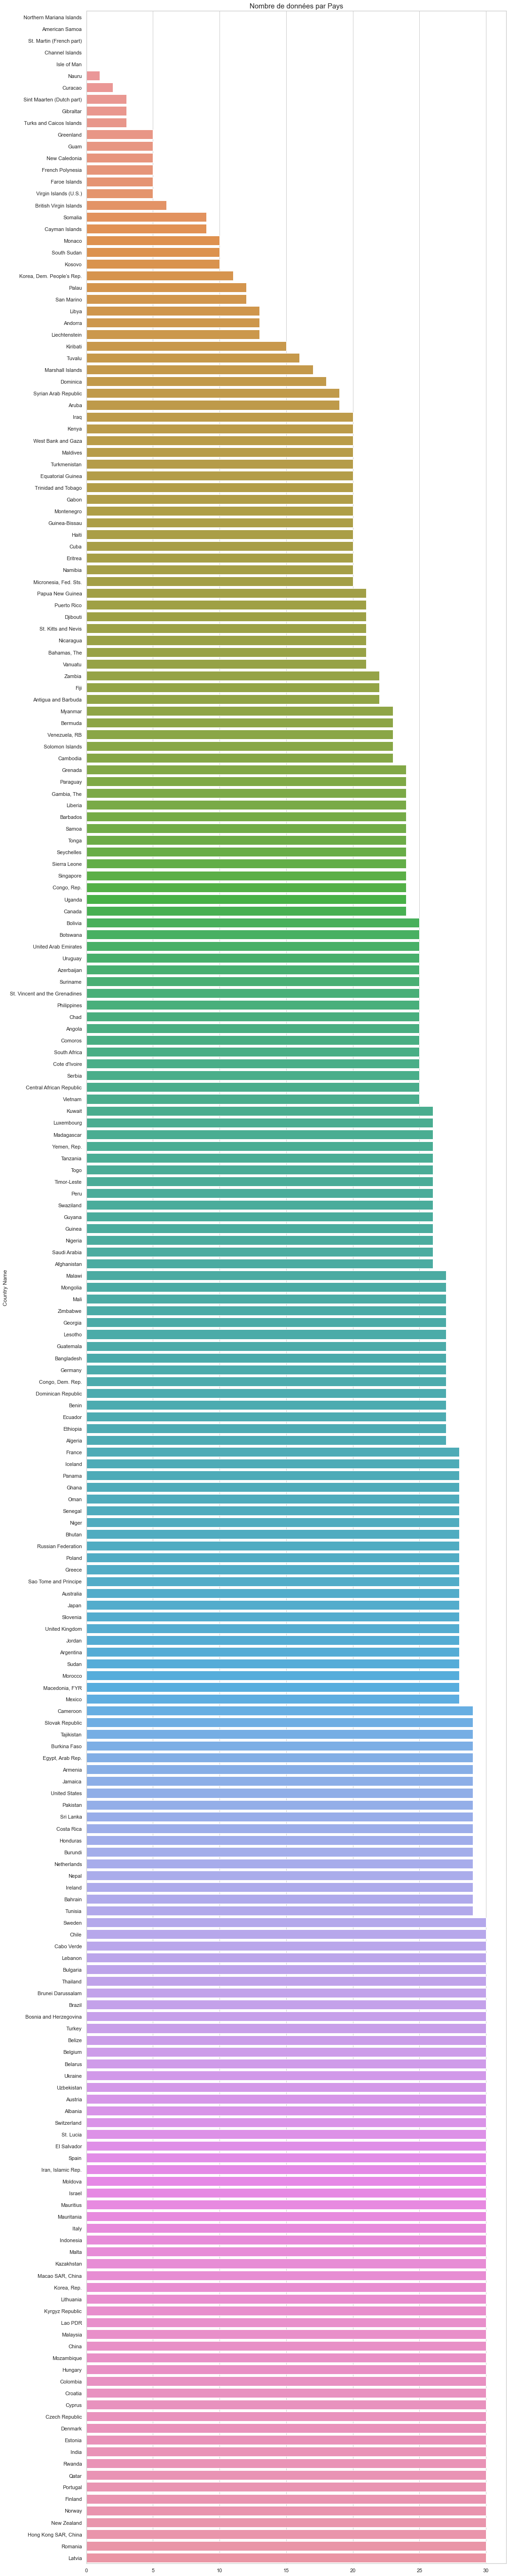

In [1057]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 100))
plt.title('Nombre de données par Pays', size=15)
plot = sns.barplot(x = Data.groupby('Country Name')[['2010', '2011', '2012', '2013', '2015']].count().sum(axis=1).sort_values().values, 
                   y = Data.groupby('Country Name')[['2010', '2011', '2012', '2013', '2015']].count().sum(axis=1).sort_values().index)
plt.show()

**9-Les valeurs manquantes par indicateur par pays**

[]

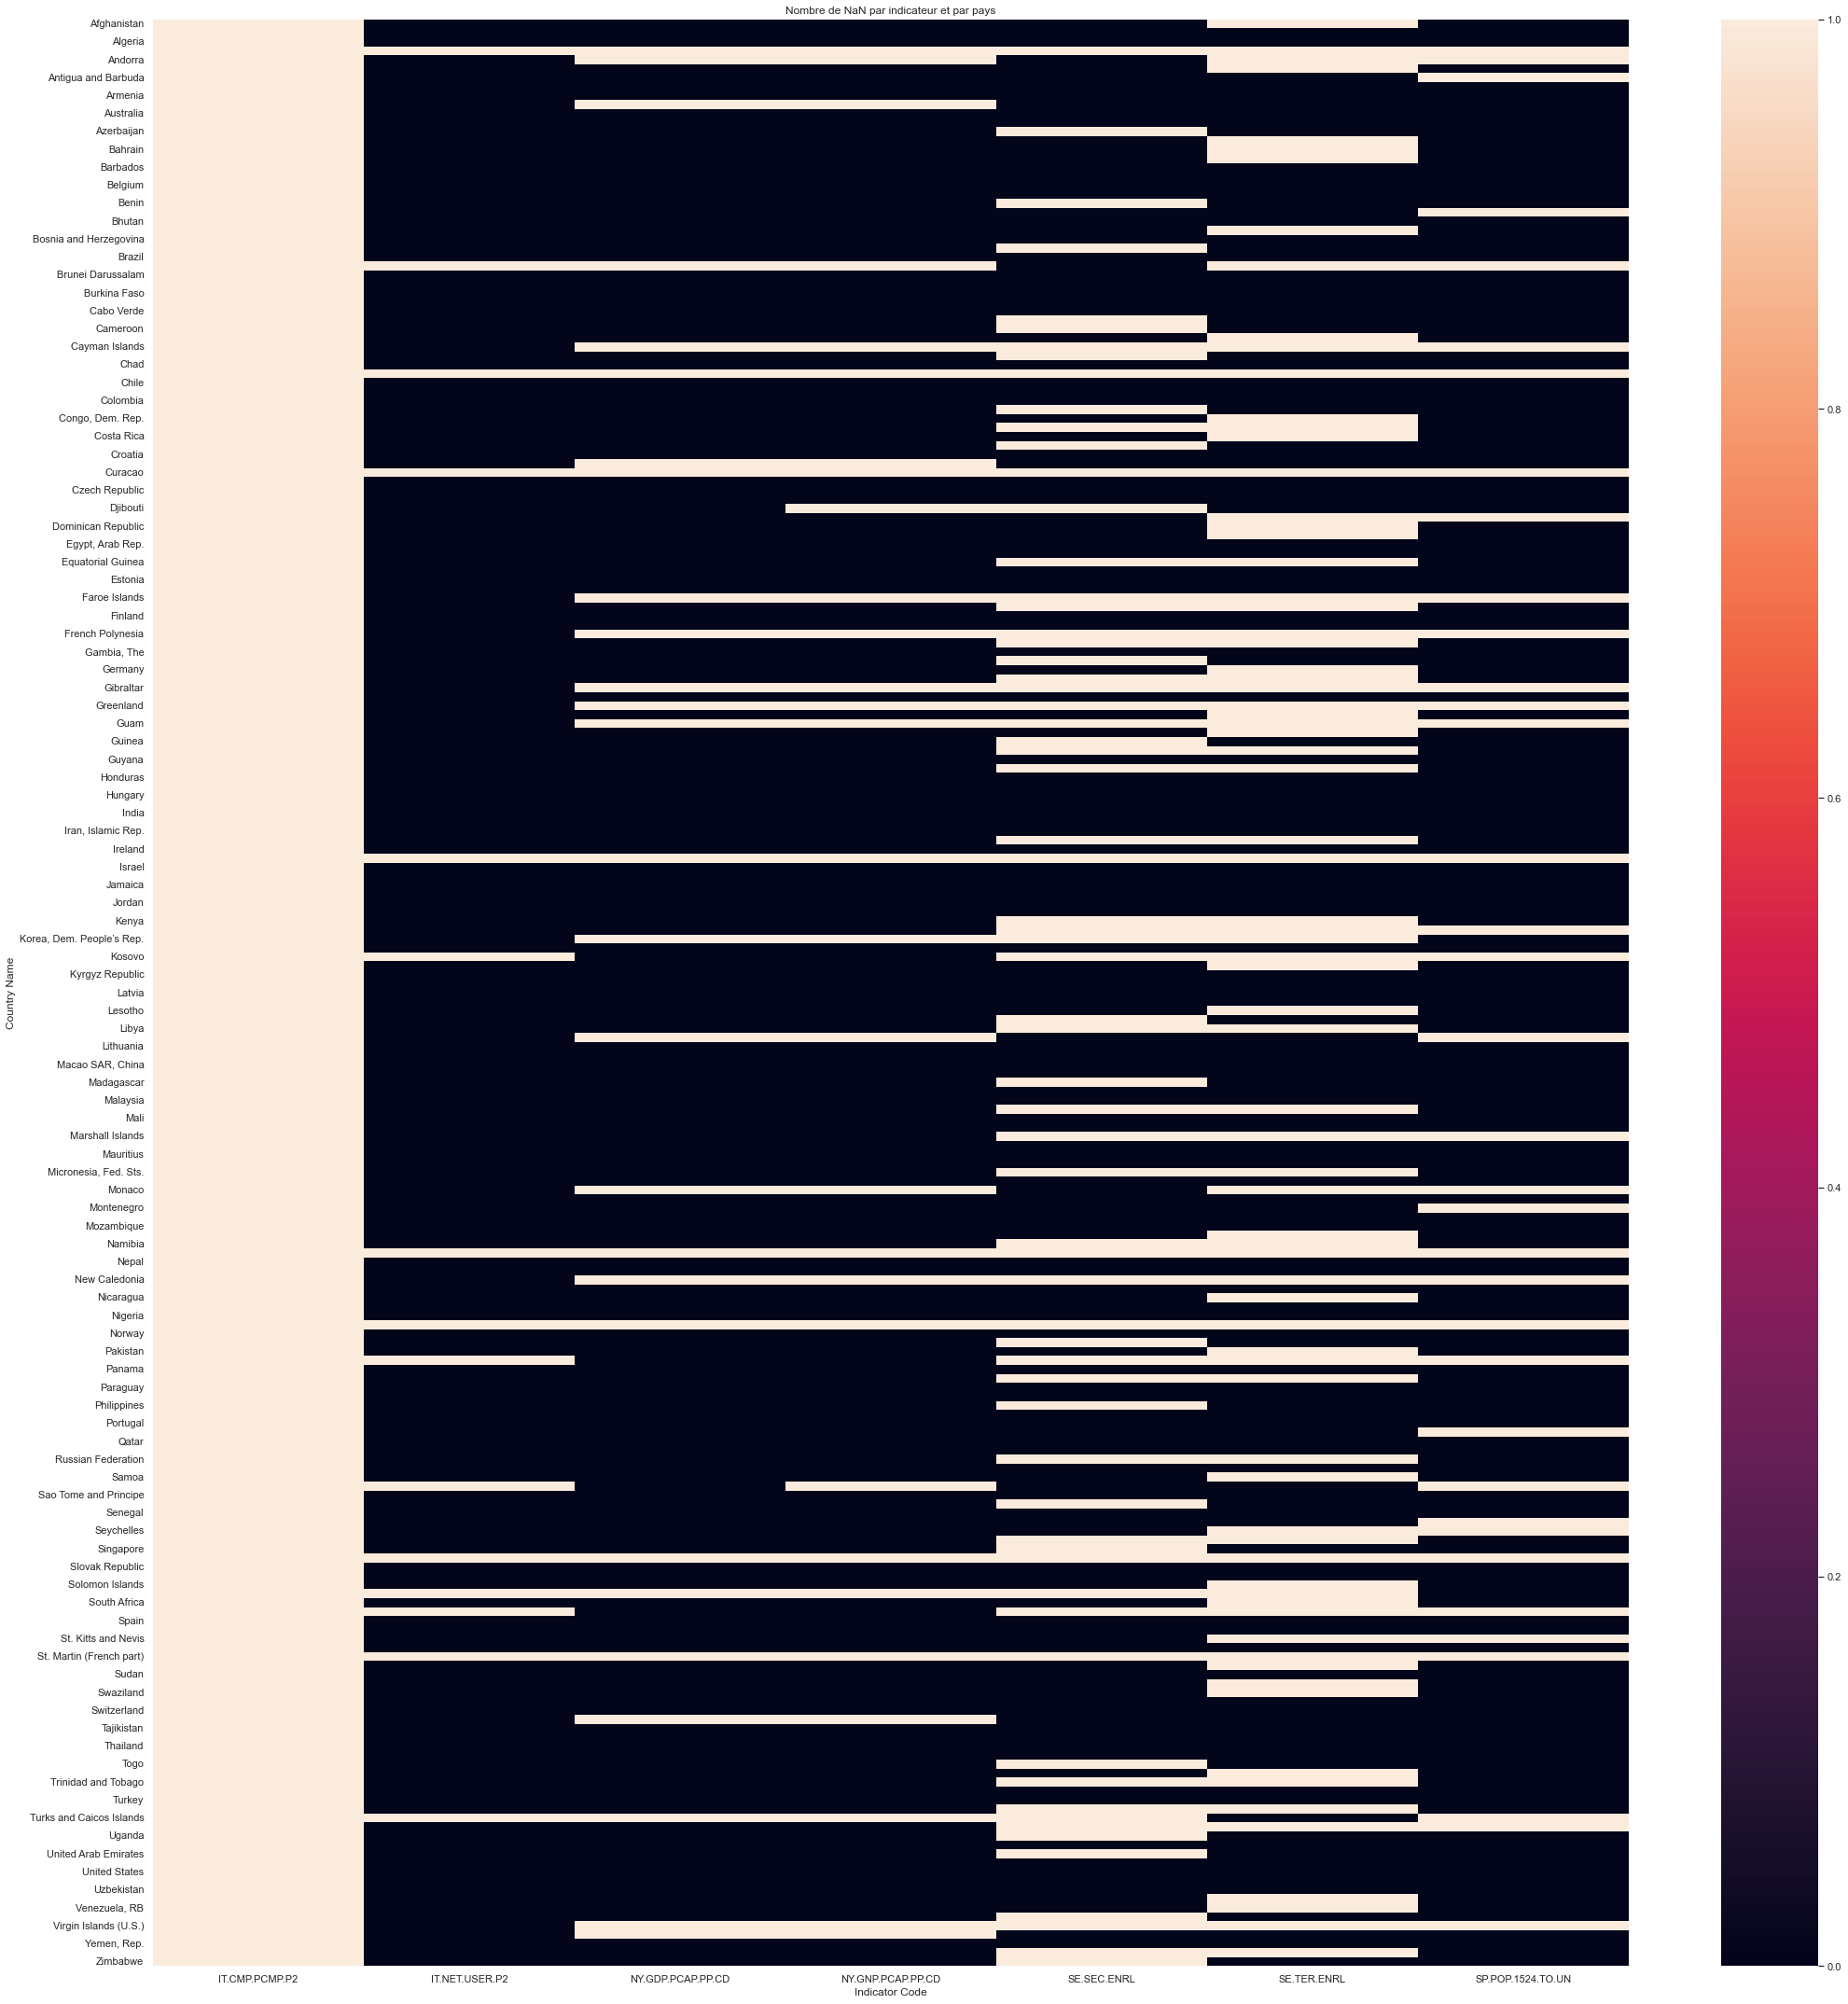

In [1058]:
plt.figure(figsize=(30,30))
plt.title('Nombre de NaN par indicateur et par pays')

ax = sns.heatmap(data = Data_heat)
plt.tight_layout()
plt.plot()

**10-Suprimmer les pays qui ont aucune données**

In [1059]:
PaysSansDonnée=['Northern Mariana Islands','American Samao','St. Martin(French part)','Channel Islands','Isle of Man']

In [1060]:
Data = Data[~Data['Country Name'].isin(PaysSansDonnée)]

In [1061]:
Data

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015
92816,Afghanistan,AFG,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,2.044157e+06,2.208963e+06,2.415884e+06,2.538420e+06,2.602734e+06,2.698816e+06
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,9.750400e+04,NaN,NaN,2.628740e+05,NaN
92872,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1.581601e+03,1.660740e+03,1.873154e+03,1.877412e+03,1.875447e+03,1.864974e+03
92877,Afghanistan,AFG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.590000e+03,1.680000e+03,1.900000e+03,1.900000e+03,1.890000e+03,1.880000e+03
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,4.000000e+00,5.000000e+00,5.454545e+00,5.900000e+00,7.000000e+00,8.260000e+00
...,...,...,...,...,...,...,...,...,...,...
884469,Zimbabwe,ZWE,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,9.461100e+04,9.328500e+04,9.401200e+04,9.411500e+04,NaN,1.355750e+05
884512,Zimbabwe,ZWE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1.445042e+03,1.667138e+03,1.905838e+03,1.997052e+03,2.027933e+03,2.040272e+03
884517,Zimbabwe,ZWE,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.240000e+03,1.390000e+03,1.610000e+03,1.750000e+03,1.790000e+03,1.790000e+03
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,6.400000e+00,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01,2.274282e+01


**11-Suppression des indicateurs des pays avec aucune donnée pour toutes les années**

In [1062]:
Data=Data.dropna(how='all',subset=['2010', '2011', '2012', '2013', '2014', '2015'])

In [1063]:
Data

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015
92816,Afghanistan,AFG,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,2.044157e+06,2.208963e+06,2.415884e+06,2.538420e+06,2.602734e+06,2.698816e+06
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,NaN,9.750400e+04,NaN,NaN,2.628740e+05,NaN
92872,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1.581601e+03,1.660740e+03,1.873154e+03,1.877412e+03,1.875447e+03,1.864974e+03
92877,Afghanistan,AFG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.590000e+03,1.680000e+03,1.900000e+03,1.900000e+03,1.890000e+03,1.880000e+03
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,4.000000e+00,5.000000e+00,5.454545e+00,5.900000e+00,7.000000e+00,8.260000e+00
...,...,...,...,...,...,...,...,...,...,...
884469,Zimbabwe,ZWE,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,9.461100e+04,9.328500e+04,9.401200e+04,9.411500e+04,NaN,1.355750e+05
884512,Zimbabwe,ZWE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1.445042e+03,1.667138e+03,1.905838e+03,1.997052e+03,2.027933e+03,2.040272e+03
884517,Zimbabwe,ZWE,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.240000e+03,1.390000e+03,1.610000e+03,1.750000e+03,1.790000e+03,1.790000e+03
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,6.400000e+00,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01,2.274282e+01


**12-Remplacer les valeurs manquante par la valeur d'avant ou d'après**

In [1064]:
Data=Data.fillna(method='ffill').fillna(method='bfill')

In [1065]:
Data

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015
92816,Afghanistan,AFG,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,2.044157e+06,2.208963e+06,2.415884e+06,2.538420e+06,2.602734e+06,2.698816e+06
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,2.044157e+06,9.750400e+04,2.415884e+06,2.538420e+06,2.628740e+05,2.698816e+06
92872,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1.581601e+03,1.660740e+03,1.873154e+03,1.877412e+03,1.875447e+03,1.864974e+03
92877,Afghanistan,AFG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.590000e+03,1.680000e+03,1.900000e+03,1.900000e+03,1.890000e+03,1.880000e+03
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,4.000000e+00,5.000000e+00,5.454545e+00,5.900000e+00,7.000000e+00,8.260000e+00
...,...,...,...,...,...,...,...,...,...,...
884469,Zimbabwe,ZWE,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,9.461100e+04,9.328500e+04,9.401200e+04,9.411500e+04,2.995938e+06,1.355750e+05
884512,Zimbabwe,ZWE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1.445042e+03,1.667138e+03,1.905838e+03,1.997052e+03,2.027933e+03,2.040272e+03
884517,Zimbabwe,ZWE,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.240000e+03,1.390000e+03,1.610000e+03,1.750000e+03,1.790000e+03,1.790000e+03
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,6.400000e+00,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01,2.274282e+01


**13-Calculer la moyenne sur les 6 années**

In [1066]:
Data['mean_years']=Data[['2010', '2011', '2012', '2013', '2014', '2015']].mean(axis=1)

In [1067]:
Data

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,mean_years
92816,Afghanistan,AFG,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,2.044157e+06,2.208963e+06,2.415884e+06,2.538420e+06,2.602734e+06,2.698816e+06,2.418162e+06
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,2.044157e+06,9.750400e+04,2.415884e+06,2.538420e+06,2.628740e+05,2.698816e+06,1.676276e+06
92872,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1.581601e+03,1.660740e+03,1.873154e+03,1.877412e+03,1.875447e+03,1.864974e+03,1.788888e+03
92877,Afghanistan,AFG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.590000e+03,1.680000e+03,1.900000e+03,1.900000e+03,1.890000e+03,1.880000e+03,1.806667e+03
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,4.000000e+00,5.000000e+00,5.454545e+00,5.900000e+00,7.000000e+00,8.260000e+00,5.935758e+00
...,...,...,...,...,...,...,...,...,...,...,...
884469,Zimbabwe,ZWE,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,9.461100e+04,9.328500e+04,9.401200e+04,9.411500e+04,2.995938e+06,1.355750e+05,5.845893e+05
884512,Zimbabwe,ZWE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1.445042e+03,1.667138e+03,1.905838e+03,1.997052e+03,2.027933e+03,2.040272e+03,1.847213e+03
884517,Zimbabwe,ZWE,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.240000e+03,1.390000e+03,1.610000e+03,1.750000e+03,1.790000e+03,1.790000e+03,1.595000e+03
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,6.400000e+00,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01,2.274282e+01,1.356793e+01


**Creer un tableau sans les années**

In [1068]:
Data= Data.loc[: , ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'mean_years'] ]

In [1069]:
Data

,Country Name,Country Code,Indicator Name,Indicator Code,mean_years
92816,Afghanistan,AFG,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,2.418162e+06
92829,Afghanistan,AFG,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.676276e+06
92872,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1.788888e+03
92877,Afghanistan,AFG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.806667e+03
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,5.935758e+00
...,...,...,...,...,...
884469,Zimbabwe,ZWE,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,5.845893e+05
884512,Zimbabwe,ZWE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1.847213e+03
884517,Zimbabwe,ZWE,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,1.595000e+03
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,1.356793e+01


**Covertir en fichier excel**

In [1070]:
Data.to_excel (r'Data.xlsx', index = False, header=True)

# 3-Statistiques des indicateurs retenus

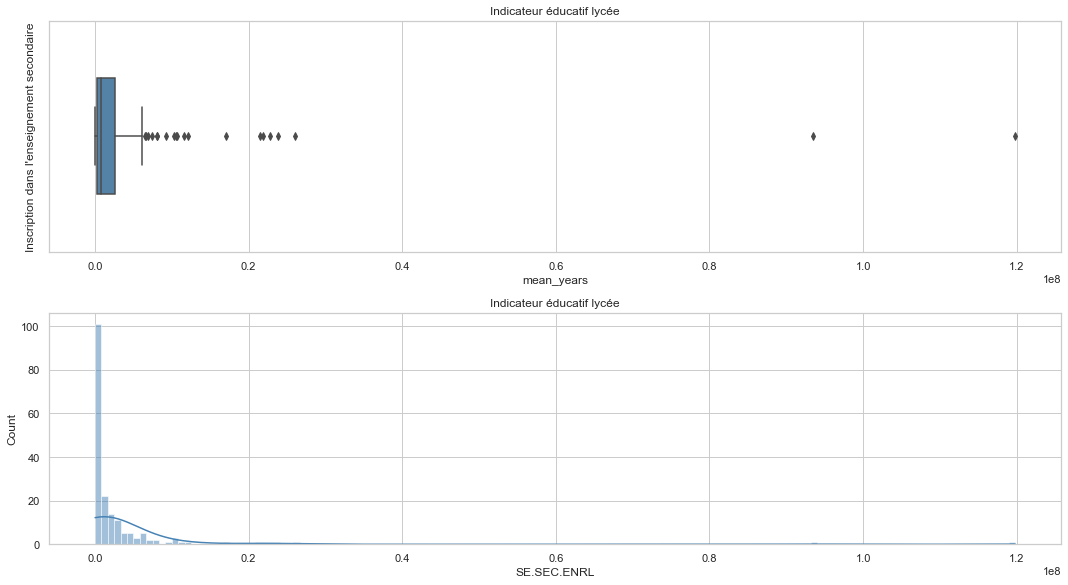

In [844]:
# Indicateur éducatif lycée : SE.SEC.ENRL 
plt.figure(figsize = (15, 20))


df_edu_sec=Data[Data['Indicator Code'] == 'SE.SEC.ENRL']

plt.subplot(5,1,1)
sns.boxplot(x=df_edu_sec['mean_years'], width=0.5, color='SteelBlue')
plt.title('Indicateur éducatif lycée')
plt.ylabel("Inscription dans l'enseignement secondaire")

plt.subplot(5,1,2)
sns.histplot(df_edu_sec['mean_years'], kde = True, color='SteelBlue')
plt.title('Indicateur éducatif lycée')
plt.xlabel('SE.SEC.ENRL')

plt.tight_layout()

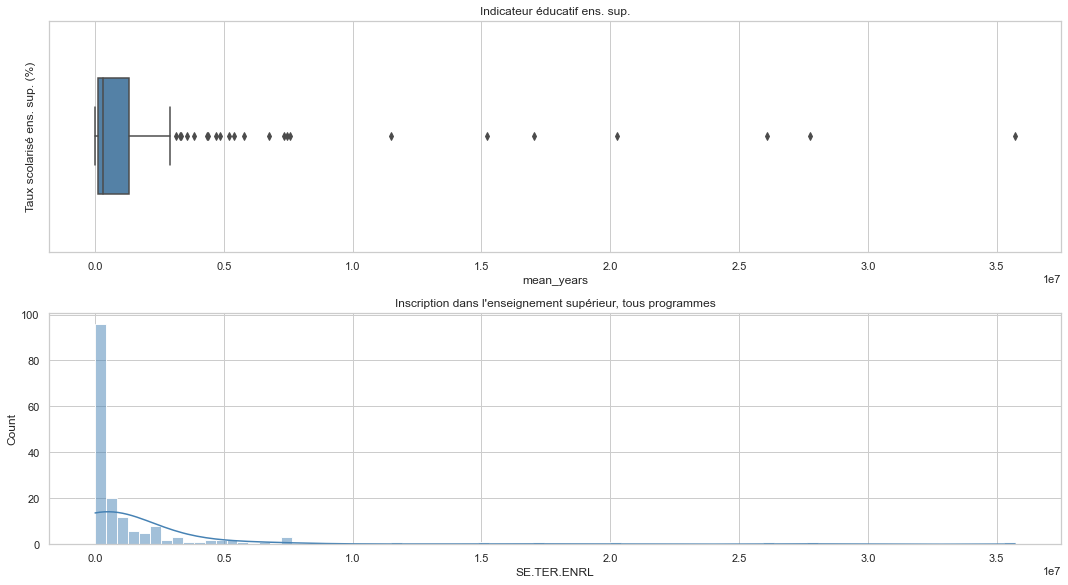

In [845]:
# Indicateur éducatif superieur : SE.TER.ENRL
plt.figure(figsize = (15, 20))

df_edu_ter=Data[Data['Indicator Code'] == 'SE.TER.ENRL']

plt.subplot(5,1,1)
sns.boxplot( x=df_edu_ter['mean_years'], width=0.5, color='SteelBlue')
plt.title('Indicateur éducatif ens. sup.')
plt.ylabel('Taux scolarisé ens. sup. (%)')

plt.subplot(5,1,2)
sns.histplot(df_edu_ter['mean_years'], kde = True, color='SteelBlue')
plt.title("Inscription dans l'enseignement supérieur, tous programmes")
plt.xlabel('SE.TER.ENRL')

plt.tight_layout()

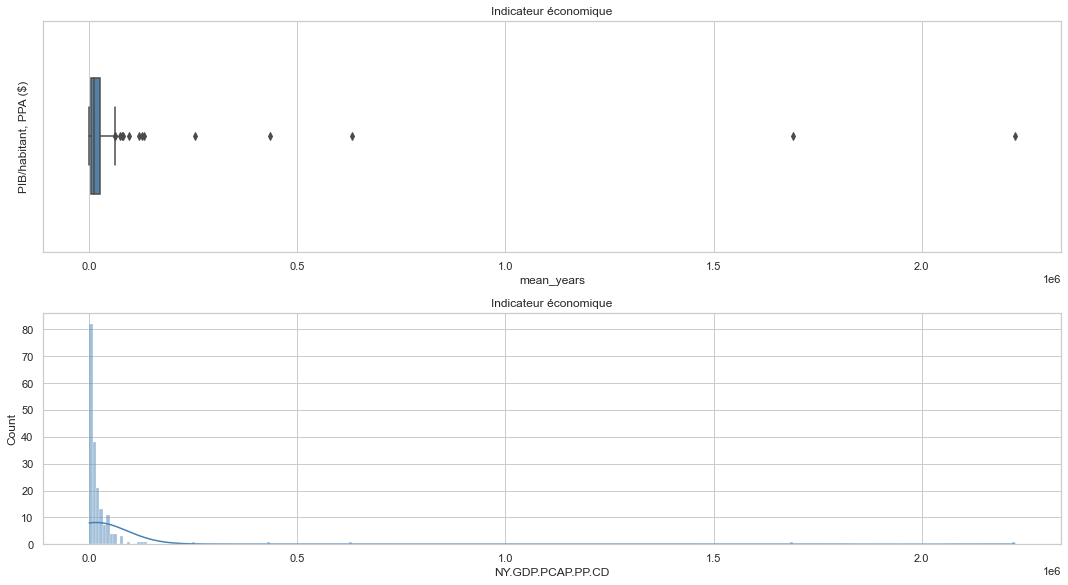

In [846]:
# Indicateur économique :  NY.GDP.PCAP.PP.CD-
plt.figure(figsize = (15, 20))

df_eco1=Data[Data['Indicator Code'] == 'NY.GDP.PCAP.PP.CD']

plt.subplot(5,1,1)
sns.boxplot( x=df_eco1['mean_years'], width=0.5, color='SteelBlue')
plt.title('Indicateur économique')
plt.ylabel('PIB/habitant, PPA ($)')

plt.subplot(5,1,2)
sns.histplot(df_eco1['mean_years'], kde = True, color='SteelBlue')
plt.title('Indicateur économique')
plt.xlabel('NY.GDP.PCAP.PP.CD')

plt.tight_layout()

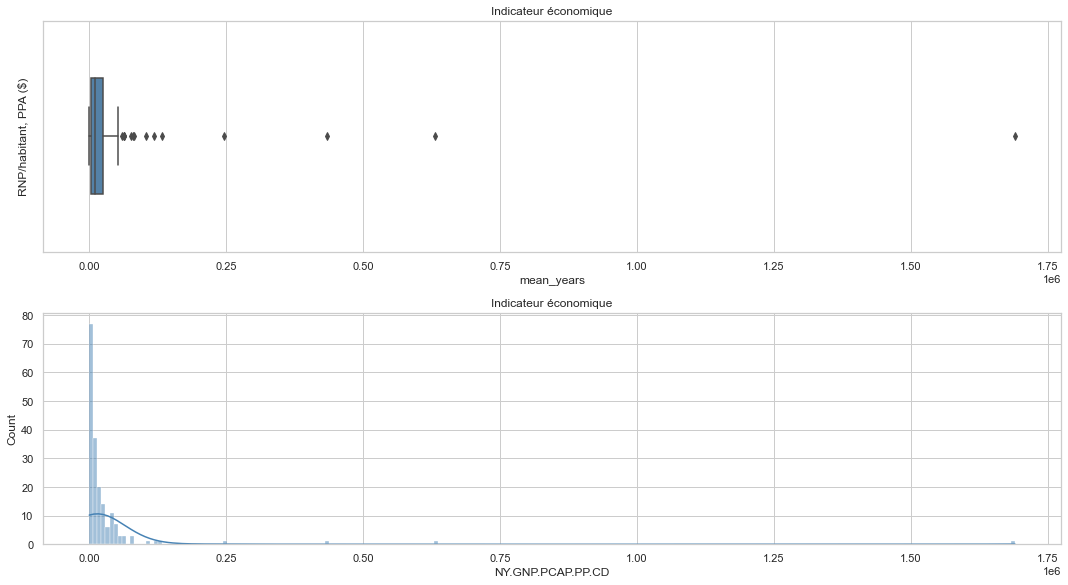

In [847]:
# Indicateur économique :NY.GNP.PCAP.PP.CD
plt.figure(figsize = (15, 20))

df_eco2=Data[Data['Indicator Code'] == 'NY.GNP.PCAP.PP.CD']

plt.subplot(5,1,1)
sns.boxplot( x=df_eco2['mean_years'], width=0.5, color='SteelBlue')
plt.title('Indicateur économique')
plt.ylabel('RNP/habitant, PPA ($)')

plt.subplot(5,1,2)
sns.histplot(df_eco2['mean_years'], kde = True, color='SteelBlue')
plt.title('Indicateur économique')
plt.xlabel('NY.GNP.PCAP.PP.CD')

plt.tight_layout()

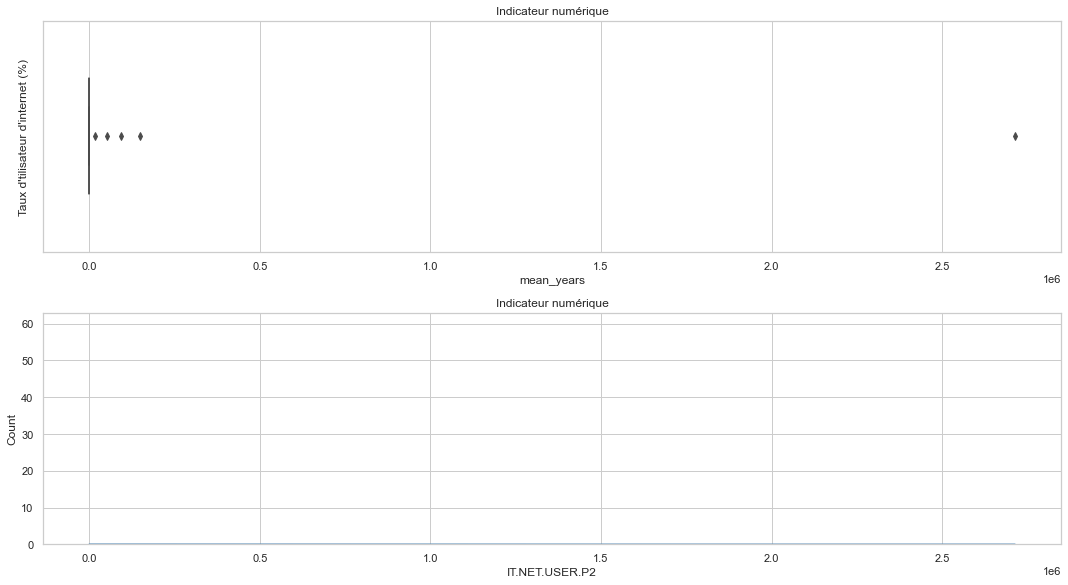

In [848]:
#Indicateur numérique : SE.TER.ENRR

plt.figure(figsize = (15, 20))

df_num=Data[Data['Indicator Code'] == 'IT.NET.USER.P2']

plt.subplot(5,1,1)
sns.boxplot( x=df_num['mean_years'], width=0.5, color='SteelBlue')
plt.title('Indicateur numérique')
plt.ylabel('Taux d\'tilisateur d\'internet (%)')

plt.subplot(5,1,2)
sns.histplot(df_num['mean_years'], kde = True, color='SteelBlue')
plt.title('Indicateur numérique')
plt.xlabel('IT.NET.USER.P2')

plt.tight_layout()

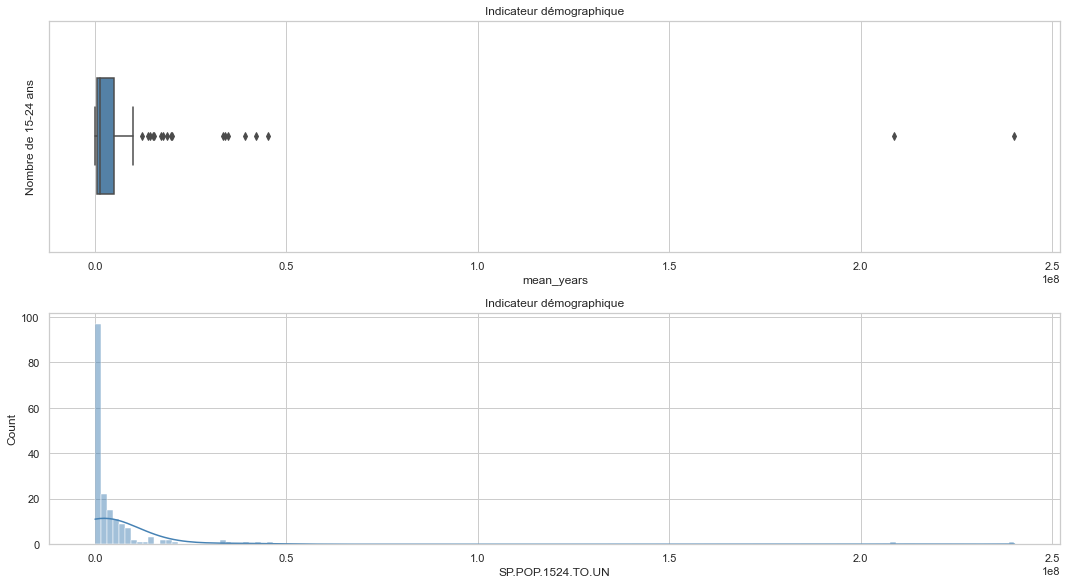

In [849]:
# Indicateur démographique : SP.POP.1524.TO.UN 

plt.figure(figsize = (15, 20))

df_pop=Data[Data['Indicator Code'] == 'SP.POP.1524.TO.UN']

plt.subplot(5,1,1)
sns.boxplot(x=df_pop['mean_years'], width=0.5, color='SteelBlue')
plt.title('Indicateur démographique')
plt.ylabel('Nombre de 15-24 ans')

plt.subplot(5,1,2)
sns.histplot(df_pop['mean_years'], kde = True, color='SteelBlue')
plt.title("Indicateur démographique")
plt.xlabel('SP.POP.1524.TO.UN')

plt.tight_layout()

**Statistiques descriptives**

In [960]:
mean_edu_sec=df_edu_sec['mean_years'].mean()
mean_edu_ter=df_edu_ter['mean_years'].mean() 
mean_eco1=df_eco1['mean_years'].mean()
mean_eco2=df_eco1['mean_years'].mean()
mean_num=df_num['mean_years'].mean()
mean_pop=df_pop['mean_years'].mean()

median_edu_sec=df_edu_sec['mean_years'].median()
median_edu_ter=df_edu_ter['mean_years'].median()
median_eco1=df_eco1['mean_years'].median()
median_eco2=df_eco2['mean_years'].median()
median_num=df_num['mean_years'].median()
median_pop=df_pop['mean_years'].median()

var_edu_sec=df_edu_sec['mean_years'].var(ddof=0)
var_edu_ter=df_edu_ter['mean_years'].var(ddof=0)
var_eco1=df_eco1['mean_years'].var(ddof=0)
var_eco2=df_eco2['mean_years'].var(ddof=0)
var_num=df_num['mean_years'].var(ddof=0)
var_pop=df_pop['mean_years'].var(ddof=0)

std_edu_sec=df_edu_sec['mean_years'].std(ddof=0)
std_edu_ter=df_edu_ter['mean_years'].std(ddof=0)
std_eco1=df_eco1['mean_years'].std(ddof=0)
std_eco2=df_eco2['mean_years'].std(ddof=0)
std_num=df_num['mean_years'].std(ddof=0)
std_pop=df_pop['mean_years'].std(ddof=0)




Data_stats = [['mean', mean_edu_sec, mean_edu_ter, mean_eco1, mean_eco2, mean_num, mean_pop],
        ['median', median_edu_sec, median_edu_ter, median_eco1, median_eco2, median_num, median_pop],
        ['var', var_edu_sec, var_edu_ter, var_eco1,var_eco2, var_num, var_pop], 
        ['std', std_edu_sec, std_edu_ter, std_eco1,std_eco2, std_num, std_pop]]
        
Data_stat = pd.DataFrame(Data_stats,columns=['Desc','Stat_edu_sec','Stat_edu_ter','Stat_eco1','Stat_eco2','Stat_num','Stat_pop'])
Data_stat

,Desc,Stat_edu_sec,Stat_edu_ter,Stat_eco1,Stat_eco2,Stat_num,Stat_pop
0,mean,3.535929e+06,1.843272e+06,4.584119e+04,4.584119e+04,1.488137e+04,6.679533e+06
1,median,7.359411e+05,3.209592e+05,1.189399e+04,1.159250e+04,4.193293e+01,1.306930e+06
2,var,1.379259e+14,2.191190e+13,4.278353e+10,1.825844e+10,3.604505e+10,5.892638e+14
3,std,1.174419e+07,4.681014e+06,2.068418e+05,1.351238e+05,1.898553e+05,2.427476e+07


# 4- SCORE

**1-Le dataframe pour établir un score**

In [961]:
Data_score= Data.pivot_table(index=['Country Name'], columns='Indicator Name')['mean_years'] 
Data_score.shape;

In [962]:
Data_score

Indicator Name,"Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","GDP per capita, PPP (current international $)","GNI per capita, PPP (current international $)",Internet users (per 100 people),"Population, ages 15-24, total"
Country Name,,,,,,
Afghanistan,2.418162e+06,1.676276e+06,1788.887940,1806.666667,5.935758,6.679801e+06
Albania,3.425055e+05,1.542362e+05,10623.779560,10560.000000,54.868149,5.856280e+05
Algeria,1.915158e+06,1.221773e+06,13594.563955,13345.000000,22.633333,6.869491e+06
Andorra,4.229833e+03,1.707667e+03,NaN,NaN,89.207404,NaN
Angola,2.892815e+05,2.388384e+05,6239.908363,5736.666667,7.316667,4.018651e+06
...,...,...,...,...,...,...
Virgin Islands (U.S.),NaN,NaN,NaN,NaN,42.929506,NaN
West Bank and Gaza,7.098293e+05,2.127117e+05,NaN,NaN,46.595699,9.650522e+05
"Yemen, Rep.",1.452912e+06,1.008774e+06,3808.375398,3605.000000,18.556152,5.688936e+06


**Valeurs manqauntes du dataframe score**

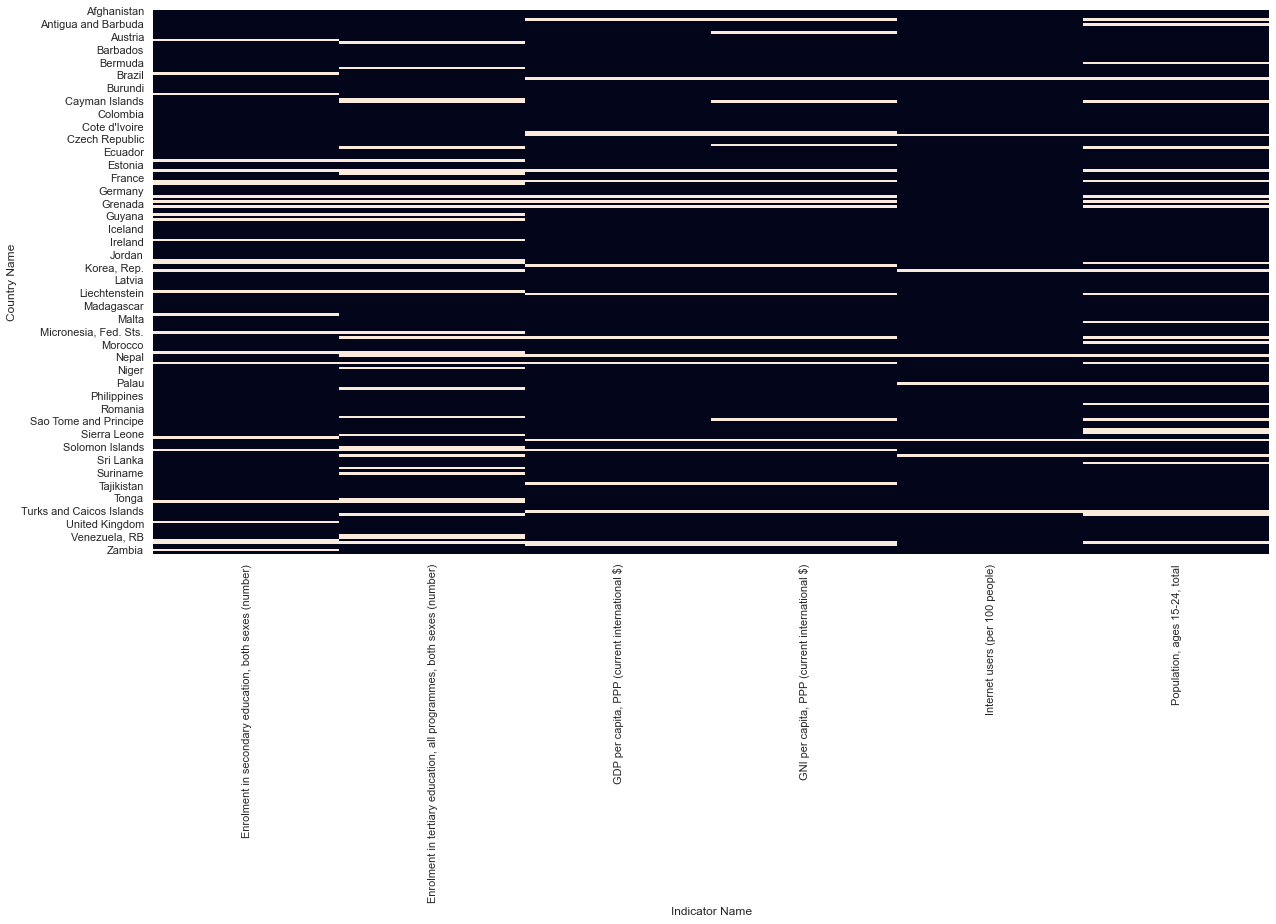

In [963]:
plt.figure(figsize=(20,10))
sns.heatmap(Data_score.isna(), cbar=False)
plt.show()

**2-Liste des pays avec au moins un indicateur manquant**

In [964]:
s_pays_indic_manquant=Data_score.notnull().sum(axis=1)
i_pays_indic_manquant=s_pays_indic_manquant[s_pays_indic_manquant<5].index
print(f'Nombre de pays à retirer : {len(i_pays_indic_manquant)}')
df_pays_retires=Data_score.loc[i_pays_indic_manquant, :].sort_values(by='Population, ages 15-24, total', ascending=False)
df_pays_retires

Nombre de pays à retirer : 38


Indicator Name,"Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","GDP per capita, PPP (current international $)","GNI per capita, PPP (current international $)",Internet users (per 100 people),"Population, ages 15-24, total"
Country Name,,,,,,
Kenya,NaN,NaN,2.722511e+03,2.701667e+03,1.283333e+01,8.584637e+06
Iraq,NaN,NaN,1.460512e+04,1.459667e+04,9.038333e+00,6.841284e+06
Syrian Arab Republic,2.034864e+06,6.693698e+05,NaN,NaN,2.529498e+01,4.427938e+06
"Korea, Dem. People’s Rep.",3.580696e+05,1.943029e+05,NaN,NaN,9.422896e+04,3.990463e+06
Haiti,NaN,NaN,1.639497e+03,1.648333e+03,1.022795e+01,2.131895e+06
Somalia,NaN,NaN,NaN,NaN,1.792209e+04,1.920560e+06
Cuba,8.056595e+05,4.842170e+05,NaN,NaN,2.457043e+01,1.504246e+06
Libya,NaN,NaN,6.307766e+05,6.307777e+05,1.494242e+05,1.120728e+06
West Bank and Gaza,7.098293e+05,2.127117e+05,NaN,NaN,4.659570e+01,9.650522e+05


la majorité des pays n'ayant pas les 6 indicateurs renseignés sont des pays à faible potentiel de population cible des 15-24 ans.
Pour les Quelque autre pays comme l'Iraq, le Kenya, le niveau de vie est faible en dessous de la moyenne (19043 $ internationnaux), le pourcentage des utilisateurs d'internet est en dessous de la moyenne (48%) et le taux de scolarisation n'est pas connu.

**3-On ne conserve que les pays avec les 6 indicateurs renseignés**

In [965]:
Data_score.dropna(thresh = 6, inplace=True)
print(f'Nombre de pays restant : {Data_score.shape[0]}')

Nombre de pays restant : 142


**4-Normaliser entre 0 et 1**

In [966]:
Data_score_normalisé=(Data_score-Data_score.min())/(Data_score.max()-Data_score.min())

In [967]:
Data_score_normalisé

Indicator Name,"Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","GDP per capita, PPP (current international $)","GNI per capita, PPP (current international $)",Internet users (per 100 people),"Population, ages 15-24, total"
Country Name,,,,,,
Afghanistan,0.020125,0.046864,0.008299,0.008792,0.053353,0.027715
Albania,0.002802,0.004252,0.075287,0.075140,0.566412,0.002337
Algeria,0.015927,0.034139,0.097812,0.096250,0.228428,0.028505
Angola,0.002358,0.006620,0.042048,0.038581,0.067832,0.016633
Argentina,0.030122,0.063140,0.143706,0.140402,0.593034,0.028521
...,...,...,...,...,...,...
United States,0.178808,0.567535,0.390867,0.399983,0.751412,0.188305
Uruguay,0.190094,0.425681,0.140626,0.136208,0.578294,0.002061
Uzbekistan,0.035272,0.007423,0.033229,0.035107,0.276310,0.025403


**5-Calcul du score pour chaque pays en fonction des indicateur**

**La pondération appliquée**

**Educatif:**

Enrolment in secondary education, both sexes (number): 2

Enrolment in tertiary education, all programmes, both sexes (number): 2

**Economique:**

GDP per capita, PPP (current international $): 3

GNI per capita, PPP (current international $): 3

**Numerqiue:**

Internet users (per 100 people): 4

**Démografique:**

Population, ages 15-24, total: 1

**Score**

In [1001]:
Data_score_normalisé['Country Name'] = Data_score.index
Data_score_normalisé['Score']=[(row[0]*1 + row[1]*2 + row[2]*3 + row[3]*3 + row[4]*4 + row[5]*1)/14 for row in zip(Data_score['Enrolment in secondary education, both sexes (number)'], Data_score['Enrolment in tertiary education, all programmes, both sexes (number)'], Data_score['GDP per capita, PPP (current international $)'], Data_score['GNI per capita, PPP (current international $)'], Data_score['Internet users (per 100 people)'], Data_score['Population, ages 15-24, total'])]
Data=Data_score_normalisé.sort_values(by='Score',ascending=False).head(10)

In [1002]:
Data

Indicator Name,"Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","GDP per capita, PPP (current international $)","GNI per capita, PPP (current international $)",Internet users (per 100 people),"Population, ages 15-24, total",Country Name,Score
Country Name,,,,,,,,
India,1.000000,0.777073,0.033829,0.033755,0.152324,1.000000,India,2.968099e+07
China,0.780045,1.000000,0.084906,0.084855,0.443547,0.869050,China,2.669279e+07
United States,0.178808,0.567535,0.390867,0.399983,0.751412,0.188305,United States,7.681394e+06
Indonesia,0.181978,0.161355,0.068157,0.066285,0.151496,0.174586,Indonesia,5.382054e+06
Brazil,0.198413,0.208147,0.111530,0.109350,0.513305,0.139532,Brazil,5.162643e+06
Bangladesh,0.087684,0.211444,0.016382,0.018368,0.075224,0.141063,Bangladesh,4.252807e+06
Pakistan,0.089142,0.087486,0.029367,0.031494,0.102712,0.163090,Pakistan,4.011341e+06
Uruguay,0.190094,0.425681,0.140626,0.136208,0.578294,0.002061,Uruguay,3.845027e+06
Nigeria,0.067004,0.151444,0.036991,0.035511,0.176352,0.144496,Nigeria,3.829619e+06


**Selectionner les 5 premier pays**

In [1003]:
DataTop5=Data.iloc[[0,1,2,3,4,],:]

In [1004]:
DataTop5

Indicator Name,"Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","GDP per capita, PPP (current international $)","GNI per capita, PPP (current international $)",Internet users (per 100 people),"Population, ages 15-24, total",Country Name,Score
Country Name,,,,,,,,
India,1.000000,0.777073,0.033829,0.033755,0.152324,1.000000,India,2.968099e+07
China,0.780045,1.000000,0.084906,0.084855,0.443547,0.869050,China,2.669279e+07
United States,0.178808,0.567535,0.390867,0.399983,0.751412,0.188305,United States,7.681394e+06
Indonesia,0.181978,0.161355,0.068157,0.066285,0.151496,0.174586,Indonesia,5.382054e+06
Brazil,0.198413,0.208147,0.111530,0.109350,0.513305,0.139532,Brazil,5.162643e+06


In [1005]:
# Constitution du dataframe de visualisation
DataTop5=DataTop5.rename(columns={'Enrolment in secondary education, both sexes (number)':'edu_sec',
                                                'Enrolment in tertiary education, all programmes, both sexes (number)':'edu_ter',
                                                'GDP per capita, PPP (current international $)':'eco1',
                                                'GNI per capita, PPP (current international $)':'eco2',
                                                 'Internet users (per 100 people)':'num', 
                                                  'Population, ages 15-24, total':'pop'})
DataTop5= DataTop5.sort_values(by='Score',ascending=False)

/var/folders/6p/1hr8w7kj7rxfl0_9t_x_f__w0000gn/T/ipykernel_94823/3442168888.py:29: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(angles, values, 'o-', linewidth=1, linestyle='solid')
/var/folders/6p/1hr8w7kj7rxfl0_9t_x_f__w0000gn/T/ipykernel_94823/3442168888.py:29: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(angles, values, 'o-', linewidth=1, linestyle='solid')
/var/folders/6p/1hr8w7kj7rxfl0_9t_x_f__w0000gn/T/ipykernel_94823/3442168888.py:29: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(angles, values, 'o-', linewidth=1, linestyle='solid')
/var/folders/6p/1hr8w7kj7rxfl0_9t_x_f__w0000gn/T/ipy

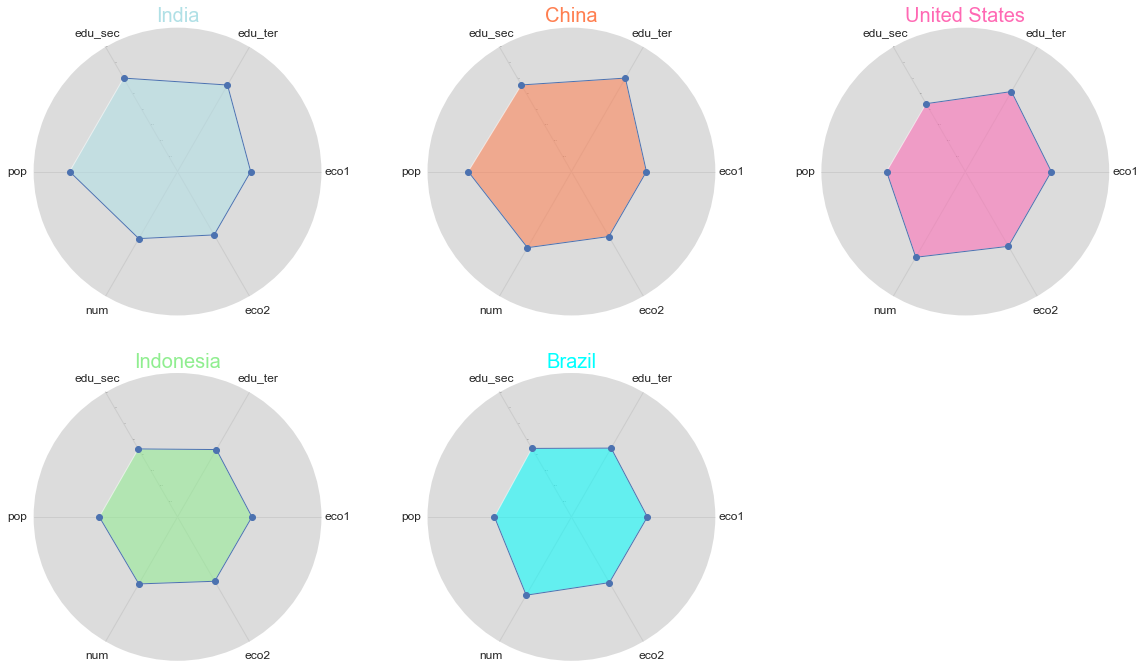

In [1006]:
DataTop5_plot = DataTop5[['edu_sec','edu_ter','eco1','eco2','num', 'pop']]
plt.rc('axes', facecolor = 'Gainsboro')

# Nombre de variable
categories=list(DataTop5_plot.columns)

N = len(categories)
 
# Quel sera l'angle de chaque axe dans le tracé ? (on divise le plot / nombre de variable)
angles = [n / float(N) * 2 * pi for n in range(N)]

 
fig = plt.figure(1, figsize=(20,18))
    
colors = ['PowderBlue', 'Coral', 'HotPink', 'LightGreen', 'Cyan']

for i, pays in enumerate(DataTop5_plot.index) : 
    
    ax = fig.add_subplot(3,3,i+1, polar=True)

    ax.set_theta_offset(2*pi/3)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles, categories, size=8)
    plt.yticks(color="grey", size=2)
    values=DataTop5_plot.iloc[i].values
    ax.plot(angles, values, 'o-', linewidth=1, linestyle='solid')
    ax.fill(angles, values, colors[i], alpha=0.55)
    ax.set_xticks(angles)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_title(pays, size=20, color=colors[i])
    ax.grid(True)
    plt.grid(True)
    plt.ylim(-2,2)

plt.show()

**Bilan 2:**

Les pays sont classés comme suite:

1-China

2-India

3-Palau

4-United States

5-Barbado

# III-Projection:

Aucune données pour nos pays dans le top 5 sur les années de prédictions 2025-2050, essyons donc avec d'autre indicateurs

**Indicateurs projection:**

Wittgenstein Projection: Mean years of schooling. Age 15-19. Total

Wittgenstein Projection: Mean years of schooling. Age 20-24. Total

Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Upper Secondary. Total

Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Upper Secondary. Total

Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total

Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total



In [974]:
#reduction temporelle
DataProjection=DataProjection.loc[: , ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2025', '2030', '2035', '2040', '2045', '2050'] ]
#filtrer avec les indicateur projection
indicatorProjection=['Wittgenstein Projection: Mean years of schooling. Age 15-19. Total','Wittgenstein Projection: Mean years of schooling. Age 20-24. Total','Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Upper Secondary. Total','Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Upper Secondary. Total','Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total' ,'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total']
DataProjection=DataProjection.loc[DataProjection['Indicator Name'].isin(indicatorProjection)]
#Palau et Barbados ne sont pas renseignés, on garde donc China','India','United States
top5=['China','India','United States','Indonesia', 'Brazil']
DataProjection=DataProjection.loc[DataProjection['Country Name'].isin(top5)]
# calculer la moyenne sur les 6 nanées
DataProjection['mean_Years']=DataProjection[['2025', '2030', '2035', '2040', '2045', '2050']].mean(axis=1)
DataProjection= DataProjection.loc[: , ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'mean_Years'] ]
DataProjection

,Country Name,Country Code,Indicator Name,Indicator Code,mean_Years
190273,Brazil,BRA,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,8.566667
190276,Brazil,BRA,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.2024.MF,10.233333
190337,Brazil,BRA,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.1519.3.MF,0.270000
190355,Brazil,BRA,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2024.3.MF,0.631667
190517,Brazil,BRA,Wittgenstein Projection: Population age 15-19 ...,PRJ.POP.1519.3.MF,3730.276667
190535,Brazil,BRA,Wittgenstein Projection: Population age 20-24 ...,PRJ.POP.2024.3.MF,9166.085000
245248,China,CHN,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.1519.MF,10.050000
245251,China,CHN,Wittgenstein Projection: Mean years of schooli...,PRJ.MYS.2024.MF,11.100000
245312,China,CHN,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.1519.3.MF,0.575000
245330,China,CHN,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2024.3.MF,0.318333


**Convertir en fichier excel**

In [975]:
DataProjection.to_excel (r'DataProjection.xlsx', index = False, header=True)

**Calcul du scoreProjection:**

In [976]:
DataProjection_score= DataProjection.pivot_table(index=['Country Name'], columns='Indicator Name')['mean_Years'] 
DataProjection_score.shape;

In [977]:
DataProjection_score

Indicator Name,Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total,Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Upper Secondary. Total,Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Upper Secondary. Total,Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total,Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total
Country Name,,,,,,
Brazil,8.566667,10.233333,0.270000,0.631667,3730.276667,9166.085000
China,10.050000,11.100000,0.575000,0.318333,36839.336667,21977.535000
India,9.416667,10.583333,0.541667,0.510000,64629.748333,61286.303333
Indonesia,9.466667,11.383333,0.291667,0.686667,5427.950000,13272.885000
United States,10.066667,12.750000,0.365000,0.698333,8061.195000,15947.761667


**Normaliser entre 0 et 1**

In [978]:
DataProjection_score_normalisé=(DataProjection_score-DataProjection_score.min())/(DataProjection_score.max()-DataProjection_score.min())

In [979]:
DataProjection_score_normalisé

Indicator Name,Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total,Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Upper Secondary. Total,Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Upper Secondary. Total,Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total,Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total
Country Name,,,,,,
Brazil,0.000000,0.000000,0.000000,0.824561,0.000000,0.000000
China,0.988889,0.344371,1.000000,0.000000,0.543667,0.245806
India,0.566667,0.139073,0.890710,0.504386,1.000000,1.000000
Indonesia,0.600000,0.456954,0.071038,0.969298,0.027877,0.078795
United States,1.000000,1.000000,0.311475,1.000000,0.071116,0.130116


 **scoore Projection**

In [999]:
DataProjection_score_normalisé['Country Name'] = DataProjection_score.index
DataProjection_score_normalisé['Score']=[(row[0] + row[1] + row[2] + row[3] + row[4] + row[5])/6 for row in zip(DataProjection_score['Wittgenstein Projection: Mean years of schooling. Age 15-19. Total'], DataProjection_score['Wittgenstein Projection: Mean years of schooling. Age 20-24. Total'], DataProjection_score['Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Upper Secondary. Total'], DataProjection_score['Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Upper Secondary. Total'], DataProjection_score['Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total'], DataProjection_score['Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total'])]
DataProjection=DataProjection_score_normalisé.sort_values(by='Score',ascending=False).head(5)

In [1000]:
DataProjection

Indicator Name,Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total,Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Upper Secondary. Total,Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Upper Secondary. Total,Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total,Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total,Country Name,Score
Country Name,,,,,,,,
India,0.566667,0.139073,0.890710,0.504386,1.000000,1.000000,India,20989.517222
China,0.988889,0.344371,1.000000,0.000000,0.543667,0.245806,China,9806.485833
United States,1.000000,1.000000,0.311475,1.000000,0.071116,0.130116,United States,4005.472778
Indonesia,0.600000,0.456954,0.071038,0.969298,0.027877,0.078795,Indonesia,3120.443889
Brazil,0.000000,0.000000,0.000000,0.824561,0.000000,0.000000,Brazil,2152.677222


In [993]:
# Constitution du dataframe de visualisation
DataProjection=DataProjection.rename(columns={'Wittgenstein Projection: Mean years of schooling. Age 15-19. Total':'M_Y_S15-19',
                                                'Wittgenstein Projection: Mean years of schooling. Age 20-24. Total':'M_Y_S20-24',
                                                'Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Upper Secondary. Total':'P15-19_U_S',
                                                'Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Upper Secondary. Total':'P20-24_U_S',
                                                 'Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total':'P15-19th_U_S', 
                                                  'Wittgenstein Projection: Population age 20-24 in thousands by highest level of educational attainment. Upper Secondary. Total':'P20-24th_U_S'})
DataProjection= DataProjection.sort_values(by='Score',ascending=False)

/var/folders/6p/1hr8w7kj7rxfl0_9t_x_f__w0000gn/T/ipykernel_94823/3940852116.py:29: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(angles, values, 'o-', linewidth=1, linestyle='solid')
/var/folders/6p/1hr8w7kj7rxfl0_9t_x_f__w0000gn/T/ipykernel_94823/3940852116.py:29: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(angles, values, 'o-', linewidth=1, linestyle='solid')
/var/folders/6p/1hr8w7kj7rxfl0_9t_x_f__w0000gn/T/ipykernel_94823/3940852116.py:29: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(angles, values, 'o-', linewidth=1, linestyle='solid')
/var/folders/6p/1hr8w7kj7rxfl0_9t_x_f__w0000gn/T/ipy

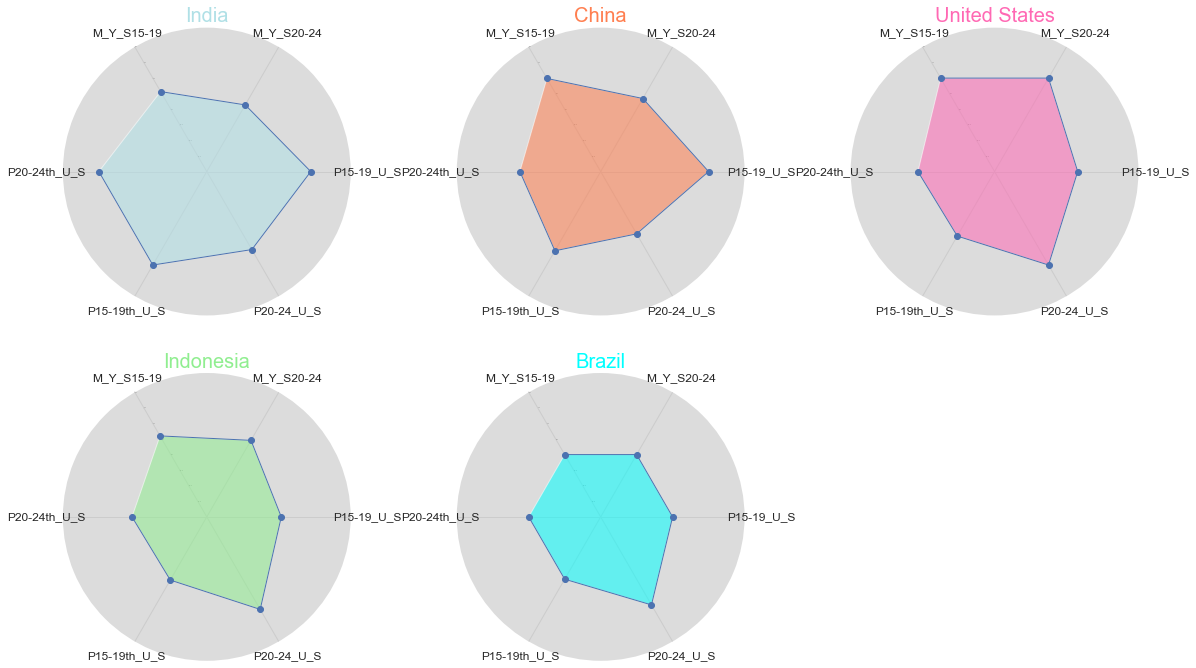

In [994]:
DataProjection_plot = DataProjection[['M_Y_S15-19','M_Y_S20-24','P15-19_U_S','P20-24_U_S','P15-19th_U_S', 'P20-24th_U_S']]
plt.rc('axes', facecolor = 'Gainsboro')

# number of variable
categories=list(DataProjection_plot.columns)

N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]

 
fig = plt.figure(1, figsize=(20,18))
    
colors = ['PowderBlue', 'Coral', 'HotPink', 'LightGreen', 'Cyan', 'RoyalBlue','Peru']

for i, pays in enumerate(DataProjection_plot.index) : 
    
    ax = fig.add_subplot(3,3,i+1, polar=True)

    ax.set_theta_offset(2*pi/3)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles, categories, size=8)
    plt.yticks(color="grey", size=2)
    values=DataProjection_plot.iloc[i].values
    ax.plot(angles, values, 'o-', linewidth=1, linestyle='solid')
    ax.fill(angles, values, colors[i], alpha=0.55)
    ax.set_xticks(angles)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_title(pays, size=20, color=colors[i])
    ax.grid(True)
    plt.grid(True)
    plt.ylim(-2,2)

plt.show()

**Bilan3**

Les pays sont classés comme suite:

1-India

2-China

3-United States

4-Indonesia

5-Brazil


# V-Conclusion:

L'analyse conduit à indiquer que les pays à cibler en priorité sont :

India

china

United Stat

Indonesia

Brazil


**Pertinence du jeu de données**

Tous les pays sont renseignés dans le jeu de données.

Suffisamment de données relatives à l'éducation.

Source des données.

**Limites**

Certains indicateur unitilisable (beaucoup de valeurs manquantes).

Manque d'indicateur business (depenses utilisation d'inernet, proportion d'éleves et etudiant se forment a distance).

Manque d'information sur la socoité académy qui peuvent guider l'étude (l'emplacement géographique , la langue et la concurrence).

**Amélioration**

Jeu de donnée plus recent 

plus de données educatives

verifier lhypothese de travail aves les décideur 

connaitre la stratégie de l'entreprise en terme de langue , marché ciblé et proximité géographique d'implantation 

autre indicateur concurence